# Basic EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("Downloads/house_price.csv")

In [3]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
# Check for missing values
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [5]:
# Summary statistics
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


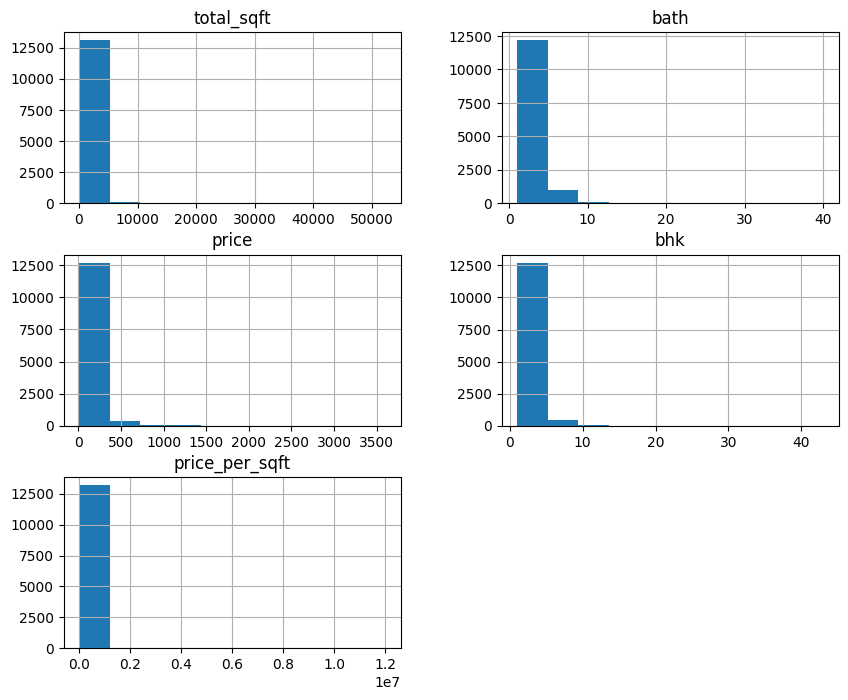

In [6]:
# Histograms for numerical columns
df.hist(figsize=(10,8))
plt.show()

# Outlier detection and removal

In [7]:
# Mean and Standard Deviation
from scipy import stats

In [9]:
z_scores = stats.zscore(df['price_per_sqft'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_outliers_removed = df[filtered_entries]

In [12]:
# Percentile Method
percentile_5 = df['price_per_sqft'].quantile(0.05)
percentile_95 = df['price_per_sqft'].quantile(0.95)
df_outliers_removed = df[(df['price_per_sqft'] > percentile_5) & (df['price_per_sqft'] < percentile_95)]

In [14]:
# IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[~((df['price_per_sqft'] < (Q1 - 1.5 * IQR)) |
(df['price_per_sqft'] > (Q3 + 1.5 * IQR)))]

In [15]:
# Z- score Method
from scipy import stats
z_scores = stats.zscore(df['price_per_sqft'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_outliers_removed = df[filtered_entries]

# Q3 Box plot and outlier removal method evalution

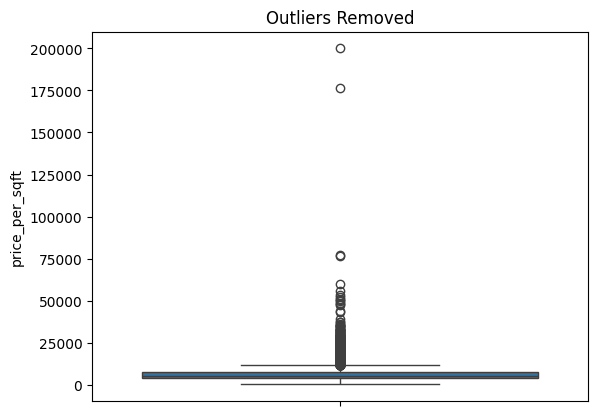

In [16]:
# Original data
sns.boxplot(df_outliers_removed['price_per_sqft'])
plt.title('Outliers Removed')
plt.show()

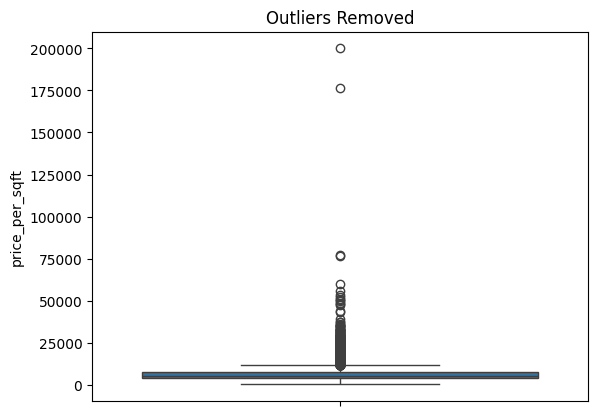

In [17]:
# Outliers removed using different methods
sns.boxplot(df_outliers_removed['price_per_sqft'])
plt.title('Outliers Removed')
plt.show()

# Q4 Normality check and transformation

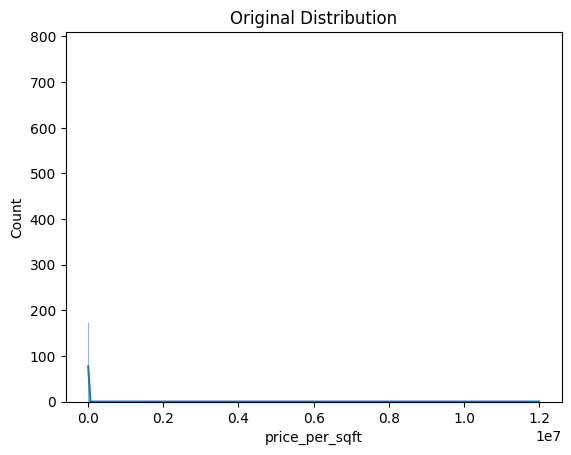

In [18]:
# Histogram and normality check
sns.histplot(df['price_per_sqft'],kde=True)
plt.title('Original Distribution')
plt.show()

In [20]:
# Skewness and kurtosis
df['price_per_sqft'].skew()
df['price_per_sqft'].kurt()

12095.21502832288

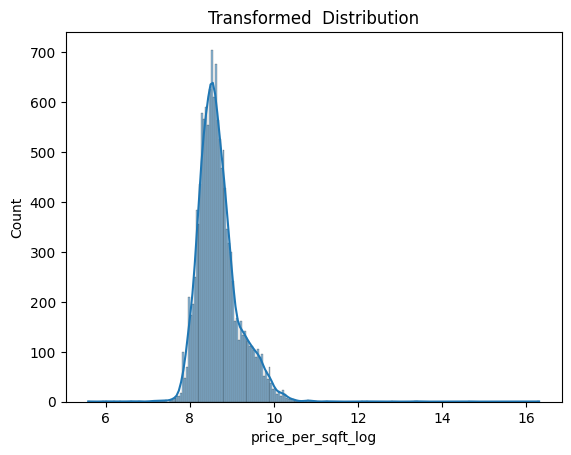

In [22]:
# Transformation
df['price_per_sqft_log'] = np.log(df['price_per_sqft'])
sns.histplot(df['price_per_sqft_log'],kde=True)
plt.title("Transformed  Distribution")
plt.show()

In [23]:
# Skewness and kurtosis after transformation
df['price_per_sqft_log'].skew()
df['price_per_sqft_log'].kurt()

9.203576429862675

# Q5 Correlation analysis and heatmap

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = df.select_dtypes(exclude=['object'])

In [34]:
df = df.apply(pd.to_numeric,errors='coerce')

In [35]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                    total_sqft      bath     price       bhk  price_per_sqft  \
total_sqft            1.000000  0.392743  0.574330  0.346013       -0.008267   
bath                  0.392743  1.000000  0.455998  0.897951        0.030883   
price                 0.574330  0.455998  1.000000  0.396883        0.028387   
bhk                   0.346013  0.897951  0.396883  1.000000        0.030955   
price_per_sqft       -0.008267  0.030883  0.028387  0.030955        1.000000   
price_per_sqft_log    0.106368  0.432538  0.585517  0.411460        0.201116   

                    price_per_sqft_log  
total_sqft                    0.106368  
bath                          0.432538  
price                         0.585517  
bhk                           0.411460  
price_per_sqft                0.201116  
price_per_sqft_log            1.000000  


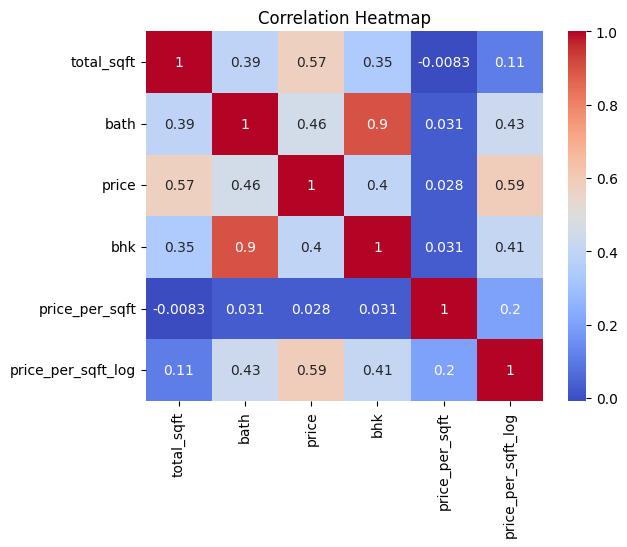

In [38]:
# Heatmap
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Q6 Scatter plots for correlation

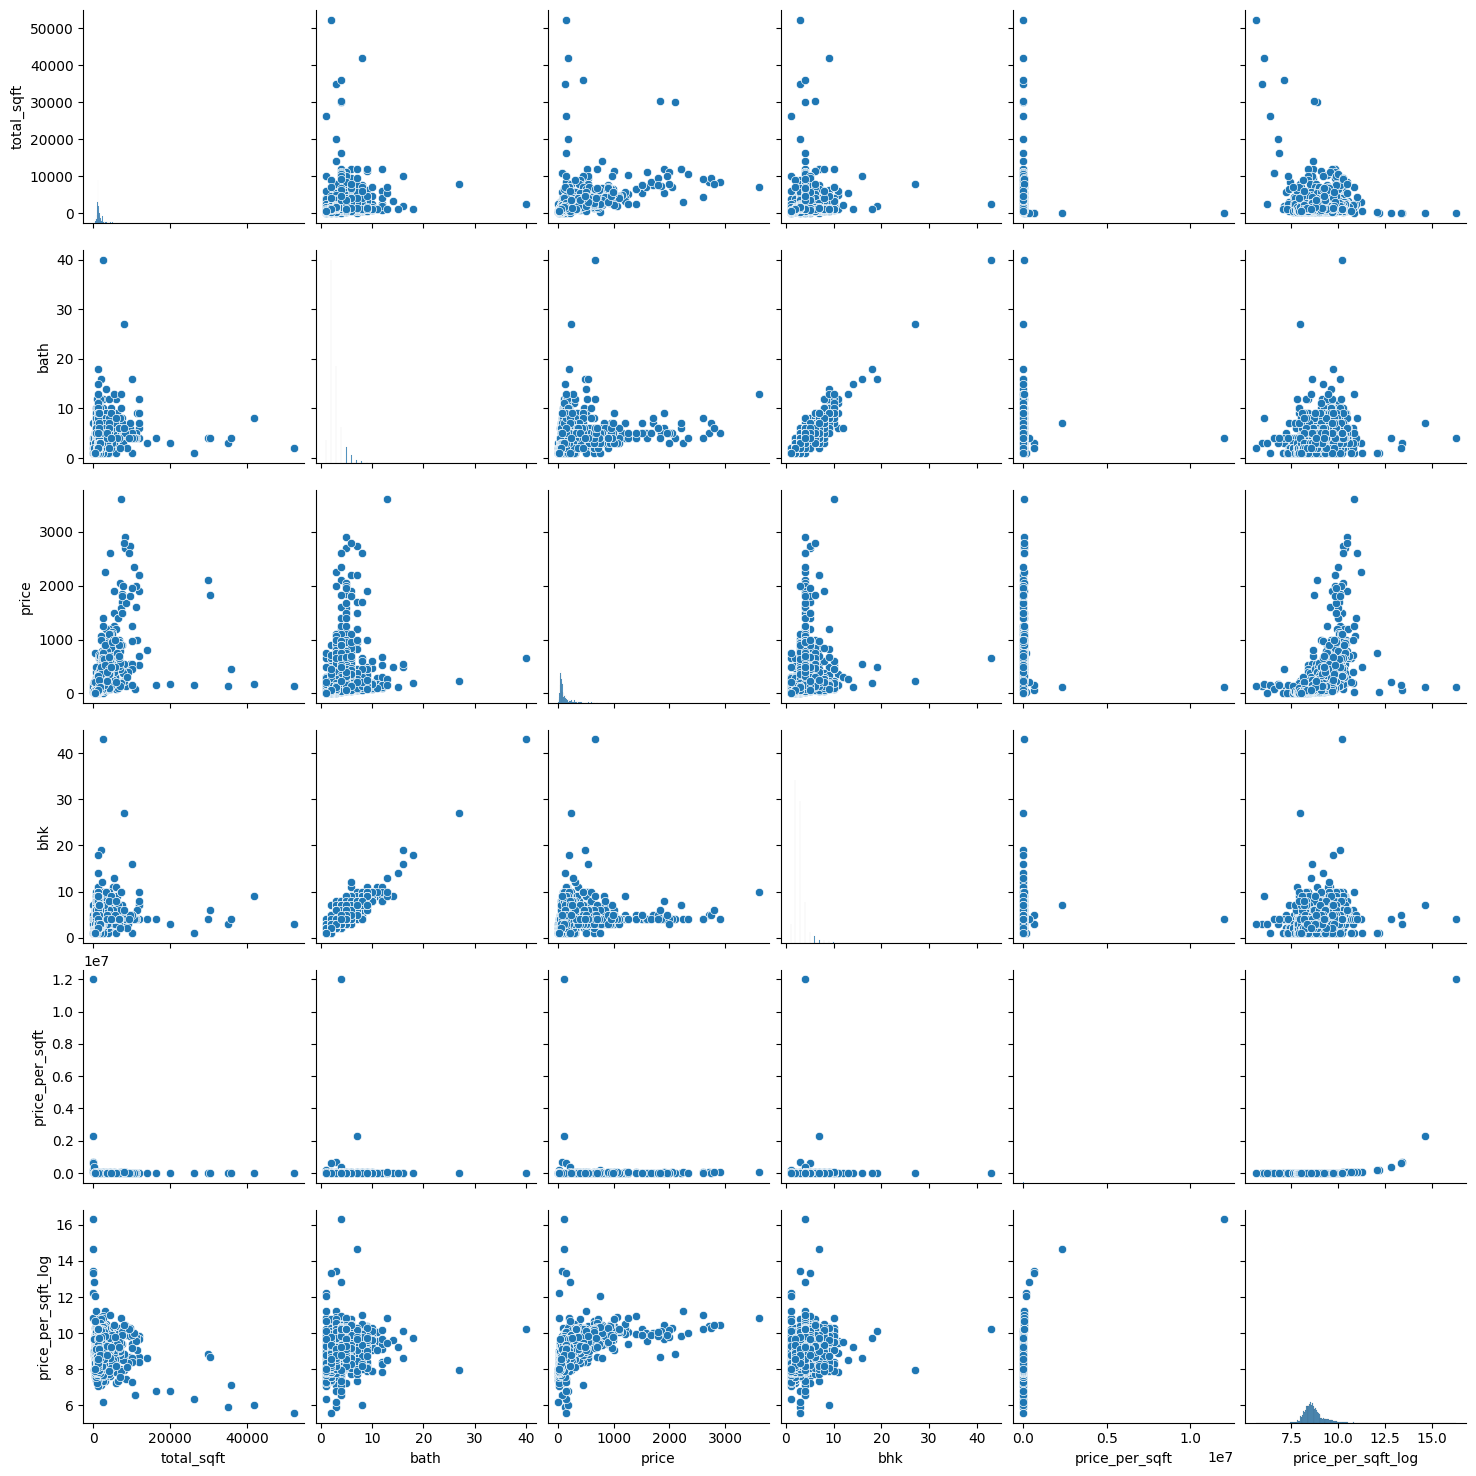

In [39]:
sns.pairplot(df)
plt.show()